In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\KumarMayank\Floating Debris\all_data.csv')

In [3]:
# Adjust the label column to start from 0 (if not already)
df['label'] = df['label'] - 1

# Drop columns you don't need
df = df.drop(['Location', 'Date', 'Sentinel-2', 'Longitude', 'Latitude'], axis=1)

# Extract features and labels
x = df.drop('label', axis=1)
y = df['label']

# Perform SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Standardize features
scaler = StandardScaler()
x_resampled = scaler.fit_transform(x_resampled)

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert data to tensors
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Reshape the data for Conv1D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)


In [5]:
# Create and compile the model
model = Sequential()
model.add(Conv1D(64, 2, padding='same', input_shape=(x_train.shape[1], 1), activation='sigmoid'))
model.add(Conv1D(64, 2, activation='sigmoid', padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train_encoded, epochs=150, batch_size=64, verbose=1, validation_data=(x_test, y_test_encoded))

Epoch 1/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.2605 - accuracy: 0.9062 - val_loss: 0.0641 - val_accuracy: 0.9780
Epoch 2/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0545 - accuracy: 0.9823 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 3/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0237 - val_accuracy: 0.9919
Epoch 4/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0193 - val_accuracy: 0.9936
Epoch 5/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0436 - val_accuracy: 0.9861
Epoch 6/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 7/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0151 -

Epoch 57/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0085 - val_accuracy: 0.9979
Epoch 58/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0105 - val_accuracy: 0.9973
Epoch 59/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0106 - val_accuracy: 0.9976
Epoch 60/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0087 - val_accuracy: 0.9976
Epoch 61/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0082 - val_accuracy: 0.9978
Epoch 62/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9971
Epoch 63/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0

2722/2722 [==============================] - 12s 5ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0101 - val_accuracy: 0.9979
Epoch 113/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0119 - val_accuracy: 0.9978
Epoch 114/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9980
Epoch 115/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0097 - val_accuracy: 0.9977
Epoch 116/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 117/150
2722/2722 [==============================] - 12s 5ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0103 - val_accuracy: 0.9981
Epoch 118/150
2722/2722 [==============================] - 13s 5ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0137 -

In [6]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

1361/1361 [==============================] - 2s 2ms/step
Test Accuracy: 0.9980
Test Precision: 0.9980
Test Recall: 0.9980
Test F1-Score: 0.9980
Cohen's Kappa: 0.9977
F2-Score: 0.9980
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): nan


C:\Users\KumarMayank\AppData\Local\Temp\ipykernel_17672\3951631589.py:45: RuntimeWarning: invalid value encountered in divide
  FNR = np.where(mask, FN / (FN + FP), 0)


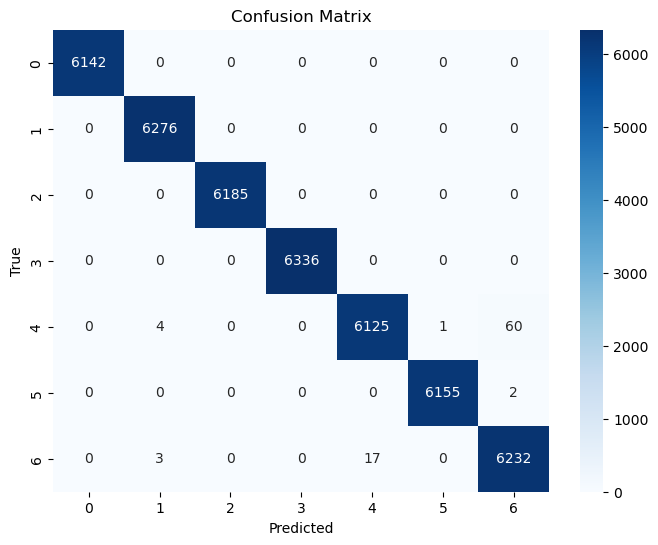

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score, fbeta_score
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_test


accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-Score: {f1:.4f}')

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

kappa = cohen_kappa_score(y_test_classes, y_pred_classes)
print(f"Cohen's Kappa: {kappa:.4f}")

# Calculate F-beta Score with beta=2
beta = 2  # You can change beta as needed
fbeta = fbeta_score(y_test_classes, y_pred_classes, beta=beta, average='weighted')
print(f'F{beta}-Score: {fbeta:.4f}')

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + np.diag(conf_matrix))
FP = FP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)


mask = (FP + TN) != 0
FPR = np.where(mask, FP / (FP + TN), 0)
FNR = np.where(mask, FN / (FN + FP), 0)

'''FPR = FP / (FP + TN)
FNR = FN / (FN + FP)  # Fixed the calculation'''

print(f'False Positive Rate (FPR): {FPR[0]:.4f}')
print(f'False Negative Rate (FNR): {FNR[0]:.4f}')

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Evaluate the model
scores = model.evaluate(x_test, y_test_encoded, verbose=1)
print("Accuracy: %.4f%%" % (scores[1] * 100))

1361/1361 [==============================] - 2s 2ms/step - loss: 0.0120 - accuracy: 0.9980
Accuracy: 99.8002%
